# Project 3

- Leonardo Meireles Murtha Oliveira : 4182085

In [17]:
# Standard libs
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [11]:
def degree_distribution(G):
    """
    Returns : degree k distribution, k values
    """
    # Dict of degrees {node: node_degree}
    vk = np.array([vk[1] for vk in G.degree()])
    
    # max degree in the graph
    max_k = np.max(vk)
    
    # max_k + 1 because it goes from [0, max)
    k_values = np.arange(0, max_k + 1)
    
    # Initializing pk
    pk = np.zeros(max_k + 1)
    
    # Counting the k's
    for k in vk:
        pk[k] += 1
    
    # Degree distribution calculation
    pk_sum = pk.sum()
    pk = pk/pk_sum
    
    return pk, k_values

In [12]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [13]:
def avg_degree(G):
    dk = dict(G.degree())
    vk = list(dk.values())
    return np.mean(vk)

In [32]:
import seaborn as sns
sns.set()

def plot_degree_distribution(G1, netname):
    pk, k_values = degree_distribution(G1)
    plt.figure(figsize=(15, 8))

    fig = plt.subplot(1, 2, 1)
    plt.plot(k_values, pk, 'ro')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Degree distribution of %s" % netname, fontsize=20)
    plt.grid(True)
    # Plotting the distribution
    sns.distplot(pk, color='r')
    pk, k_values = degree_distribution(G1)

    # Plotting with log scale
    fig = plt.subplot(1, 2, 2)
    fig.set_xscale('log')
    fig.set_yscale('log')
    plt.plot(k_values, pk, 'ro')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Log Degree distribution of %s" % netname, fontsize=20)
    plt.grid(True)
    plt.show(True)

# 1. Comparison	ofnetwork	models:
• Generate	30	networks	according	to	the	models:  
Erdös-Rényi, WattsStrogatz	(p=0.01	and	p=0.1) e Barabási-Albert.  

Consider	N	=	1000	and	 "< k >"	=	10.

• In	table,	include	the	mean	and	standard	deviation	of	the	following measures:	(i)	number	o	nodes,	(ii)	average	degree,	(iii)	second	moment	of	degree	distribution,	(iv)	average	shortest	path	length,	(v)	average	clustering	coefficient,	(vi)	transitivity,	(vii)	assortativity	coefficient.  Show	the	degree	distributions	of	the	ER,	WS	and	BA	networks  Discuss	the	main	differences	and	similarities	between	the	models.

In [16]:
# Barabasi-Albert
N = 1000
av_degree = 10
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m, seed=42)
ERD = nx.erdos_renyi_graph(N, p=0.01, seed=42)
WAT = nx.watts_strogatz_graph(N, av_degree, p=0.1, seed=42)

table = {'net': ['Barabasi-Albert', 'Erdos-Renyi', 'Watts-Strogatz'], 'N': [N, N, N],
         'avg_degree': [avg_degree(GBA), avg_degree(ERD), avg_degree(WAT)],
         'second_moment_degree': [momment_of_degree_distribution(GBA, 2), momment_of_degree_distribution(ERD, 2), momment_of_degree_distribution(WAT, 2)],
         'avg_shortest_path': [nx.average_shortest_path_length(GBA), nx.average_shortest_path_length(ERD), nx.average_shortest_path_length(WAT)],
         'avg_clustering_coeff': [nx.average_clustering(GBA), nx.average_clustering(ERD), nx.average_clustering(WAT)],
         'transitivity': [nx.transitivity(GBA), nx.transitivity(ERD), nx.transitivity(WAT)],
         'assortativity': [nx.assortativity.degree_assortativity_coefficient(GBA), nx.assortativity.degree_assortativity_coefficient(ERD), nx.assortativity.degree_assortativity_coefficient(WAT)]}

In [18]:
df = pd.DataFrame.from_dict(table)
df

,net,N,avg_degree,second_moment_degree,avg_shortest_path,avg_clustering_coeff,transitivity,assortativity
0,Barabasi-Albert,1000,9.95,0.823090,2.984062,0.039116,0.030253,-0.044156
1,Erdos-Renyi,1000,9.97,0.904516,3.260036,0.011135,0.010565,-0.012823
2,Watts-Strogatz,1000,10.00,3.137642,4.490462,0.498690,0.489661,0.027094


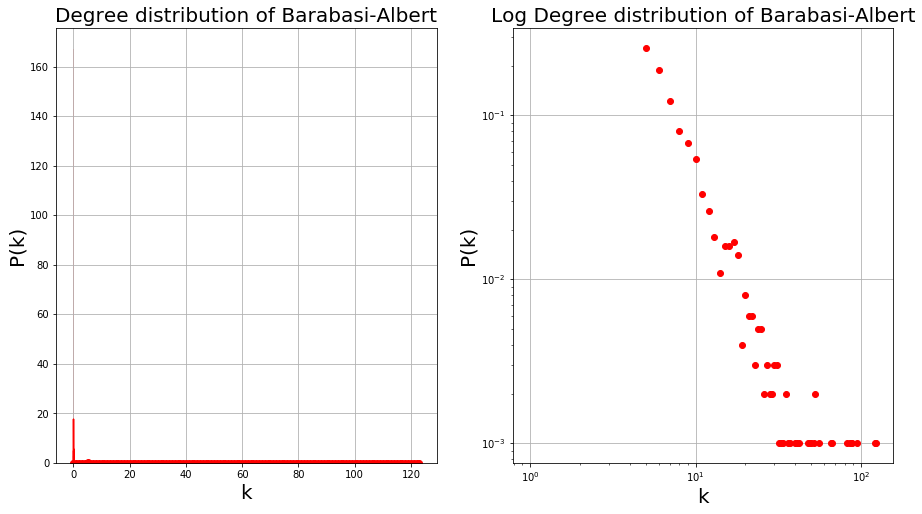

In [20]:
# Plotting the degree distributions
plot_degree_distribution(GBA, 'Barabasi-Albert')

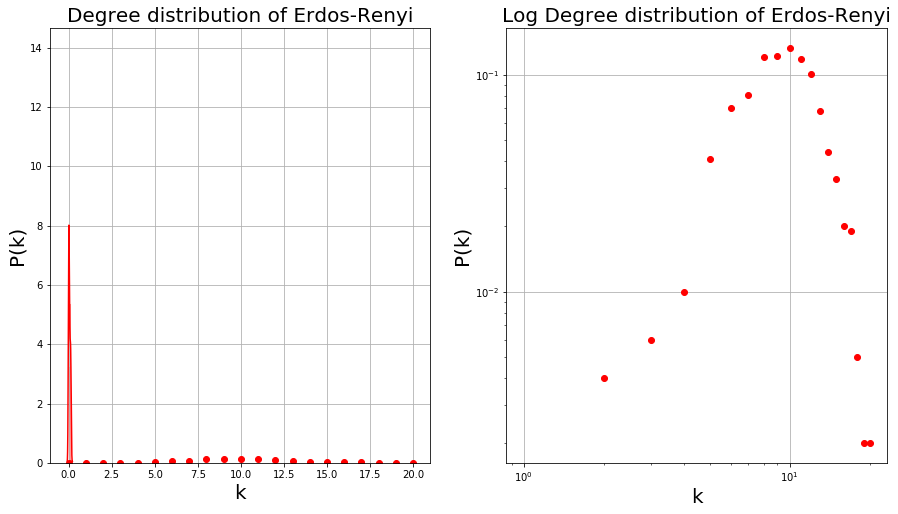

In [21]:
plot_degree_distribution(ERD, 'Erdos-Renyi')

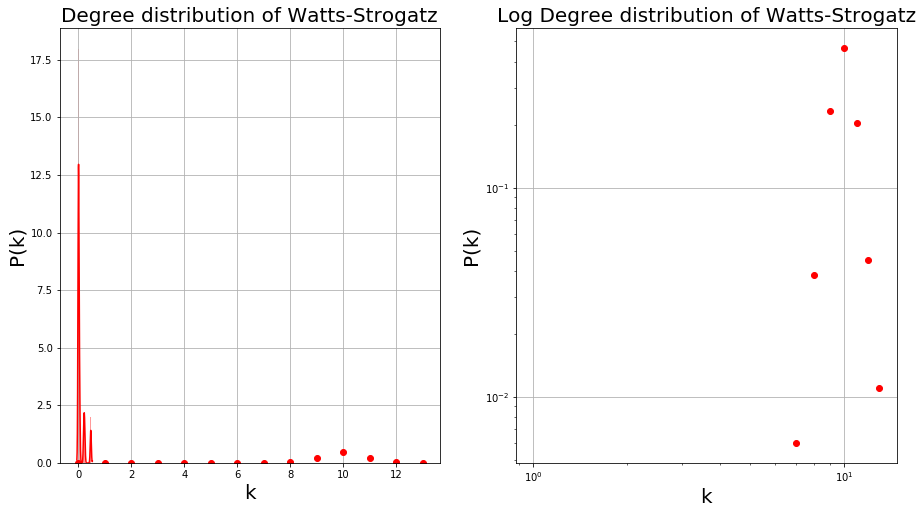

In [22]:
plot_degree_distribution(WAT, 'Watts-Strogatz')

* **Erdős–Rényi model** generates fully random networks by either uniformly choosing M pairs of nodes to connect, or by connecting each pair with probability p.
* **Watts–Strogatz** model generates networks which show the so called small-world phenomenon. Here, although the network is not dense, the average shortest path is still significantly low.  
* **Barabási–Albert** model networks are scale-free networks, meaning that their degree distribution follows a power law distribution. The model uses the preferential attachment growth, hence each new node is connected to m other nodes, choosing them with a probability which is proportional to their degree.

# 2. Erdös-Rényi network	model
*  For	the	model	ER	(N,p),	obtain	the	phase	transition curve:

In [24]:
def connected_component_subgraphs(G):
    return [G.subgraph(c).copy() for c in nx.connected_components(G)]

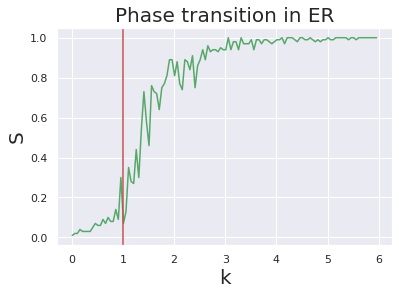

In [38]:
N = 100
S = []
vk = []

for c in arange(0.01, 6, 0.05):
    p = c/(N-1)
    G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)
    G=max(connected_component_subgraphs(G), key = len)
    S.append(len(G)/N)
    vk.append(c)
    
plt.figure()
plt.plot(vk,S,'g', label='Largest component size')
plt.xlabel("k", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.title("Phase transition in ER", fontsize=20)
plt.axvline(x=1, color = 'r')
plt.grid(True)
plt.show();